# Problema 3

In [18]:
import pandas as pd
import re
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('punkt')
tweets = pd.read_csv("/Users/luisgarcia/tw_source.csv", encoding = "ISO-8859-1", header=None)

In [23]:
tweets.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [25]:
len(tweets)

1600000

Se Encontraron 688488 Menciones
Lugar #1 Usuario @mileycyrus con 3822 menciones


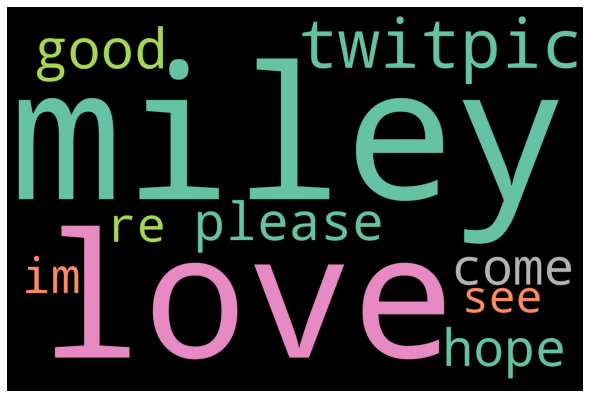

Lugar #2 Usuario @tommcfly con 3631 menciones


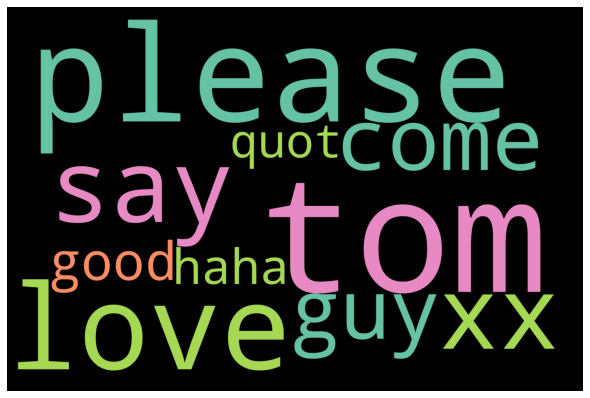

Lugar #3 Usuario @ddlovato con 2950 menciones


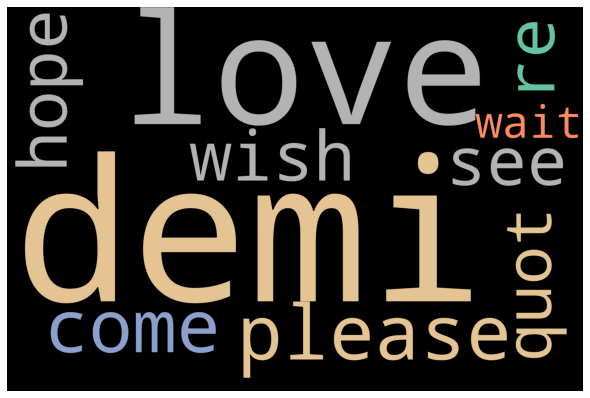

In [30]:
dictCounter = {}
dictCounterMax = {}
dictCorpora = {}
maxUsernames = []
def getContent(x):
    return x['Content']
i = 0;
for index, row in tweets.iterrows():
    pattern = re.compile("(?<![\w.-])@[A-Za-z][\w-]+")
    match = pattern.match(row[5])
    if match != None:
        username = match.group(0)
        if username not in dictCounter:
            dictCounter[username] = 0
        if username not in dictCorpora:
            dictCorpora[username] = []
        dictCounter[username]+=1
        dictCorpora[username].append({
            'Content' :  re.sub('(?<![\w.-])@[A-Za-z][\w-]+', '', row[5]),
            'Metadata': str(row[1])+','+str(row[2])+','+str(len(row[5]))
        })
        i+=1
print('Se Encontraron ' + str(i) + ' Menciones')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("n't")
for i in range(0,3):
    top = max(dictCounter, key=dictCounter.get)
    dictCounterMax[top] = dictCounter[top] + 0
    maxUsernames.append(top)
    dictCounter[top]=0

for i in range(len(maxUsernames)):
    print('Lugar #'+str(i+1)+' Usuario '+maxUsernames[i]+ ' con ' + str(dictCounterMax[maxUsernames[i]]) + ' menciones')
    c = ' '.join(list(map(getContent,dictCorpora[maxUsernames[i]])))
    text_tokens = word_tokenize(c)
    
    tokens_without_sw = [word for word in text_tokens if not word in stopwords]
    lematized = list(map(wordnet_lemmatizer.lemmatize, tokens_without_sw))
    #print(text_tokens)
    #print(tokens_without_sw)
    #print(lematized)
    wordcloud = WordCloud(width = 3000,max_words=10, height = 2000, random_state=1, background_color='black', colormap='Set2',
                          collocations=False, stopwords = STOPWORDS).generate(' '.join(lematized)) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
  
    